In [21]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# @author izhangxm
# @date 2022/11/24
# @fileName fit.py
# Copyright 2017 izhangxm@gmail.com. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

def r2(pred, y):
    # mean = 2479.03125
    r2_loss = 1 - np.square(pred - y).sum() / np.square(y - np.mean(y)).sum()
    # r2_loss = 1 - torch.square(pred-y).sum()/torch.square(y-mean).sum()
    return r2_loss


def main():
    df = pd.read_csv("dataset/data.csv")
    colums = df.columns
    y_names= colums[1:11]
    x_name = colums[0]

    # sns.pairplot(data=df[colums[:11]], diag_kind='kde')
    # plt.show()

    X = df[x_name].values

    cols = 5
    rows = math.ceil(len(y_names) / cols)
    xvals = np.arange(0, 150, 0.5)


    fig, fig_axes = plt.subplots(ncols=cols, nrows=rows, figsize=(4.2*cols,4*rows), dpi=100)
    if isinstance(fig_axes, np.ndarray):
        fig_axes = fig_axes.reshape(-1)
    else:
        fig_axes = [fig_axes]



    for i, axes in enumerate(fig_axes):
        if i >= len(y_names):
            axes.axis('off')
            continue

        y_name = y_names[i]
        Y = df[y_name].values
        axes.plot(X, Y, '*', label=f"ob:{y_name}")
        axes.set_ylabel(f'{y_name}')
        axes.set_xlabel(f'time(h)')

#         z1 = np.polyfit(X, Y, deg=1)
#         p1 = np.poly1d(z1)
#         yvals = p1(xvals)
#         pred = p1(X)
#         _r2 = r2(pred, Y)
#         axes.plot(xvals, yvals, 'b', label=f'deg=1 R^2={_r2:.2f}')
        
        
#         z2 = np.polyfit(X, Y, deg=2)
#         p2 = np.poly1d(z2)
#         yvals = p2(xvals)
#         pred = p2(X)
#         _r2 = r2(pred, Y)
#         axes.plot(xvals, yvals, 'r', label=f'deg=2 R^2={_r2:.2f}')
        
        #

        z3 = np.polyfit(X, Y, deg=3)
        p3 = np.poly1d(z3)
        yvals = p3(xvals)
        pred = p3(X)
        _r2 = r2(pred, Y)
        axes.plot(xvals, yvals, 'g', label=f'deg=3 R^2={_r2:.2f}')

        axes.legend()
        axes.set_title(f"time-{y_name} polyfit", fontsize=10)

    plt.tight_layout()
    plt.show()


    print("OK")


def main2():
    df = pd.read_csv("../dataset/data.csv")
    colums = df.columns
    y_names= colums[1:11]
    x_name = colums[0]

    X = df[x_name].values

    cols = 1
    rows = math.ceil(len(y_names) / cols)
    xvals = np.arange(0, 150, 0.5)



    for i, y_name in enumerate(y_names):
        plt.subplot(rows, cols, i+1)

        Y = df[y_name].values

        z1 = np.polyfit(X, Y, deg=2)
        p1 = np.poly1d(z1)
        yvals = p1(xvals)
        plt.plot(X, Y, '*', label=y_name)
        plt.plot(xvals, yvals, 'r', label='deg=2')
        plt.title(f"time-{y_name} polyfit")

    plt.tight_layout()
    plt.show()

    print('d')


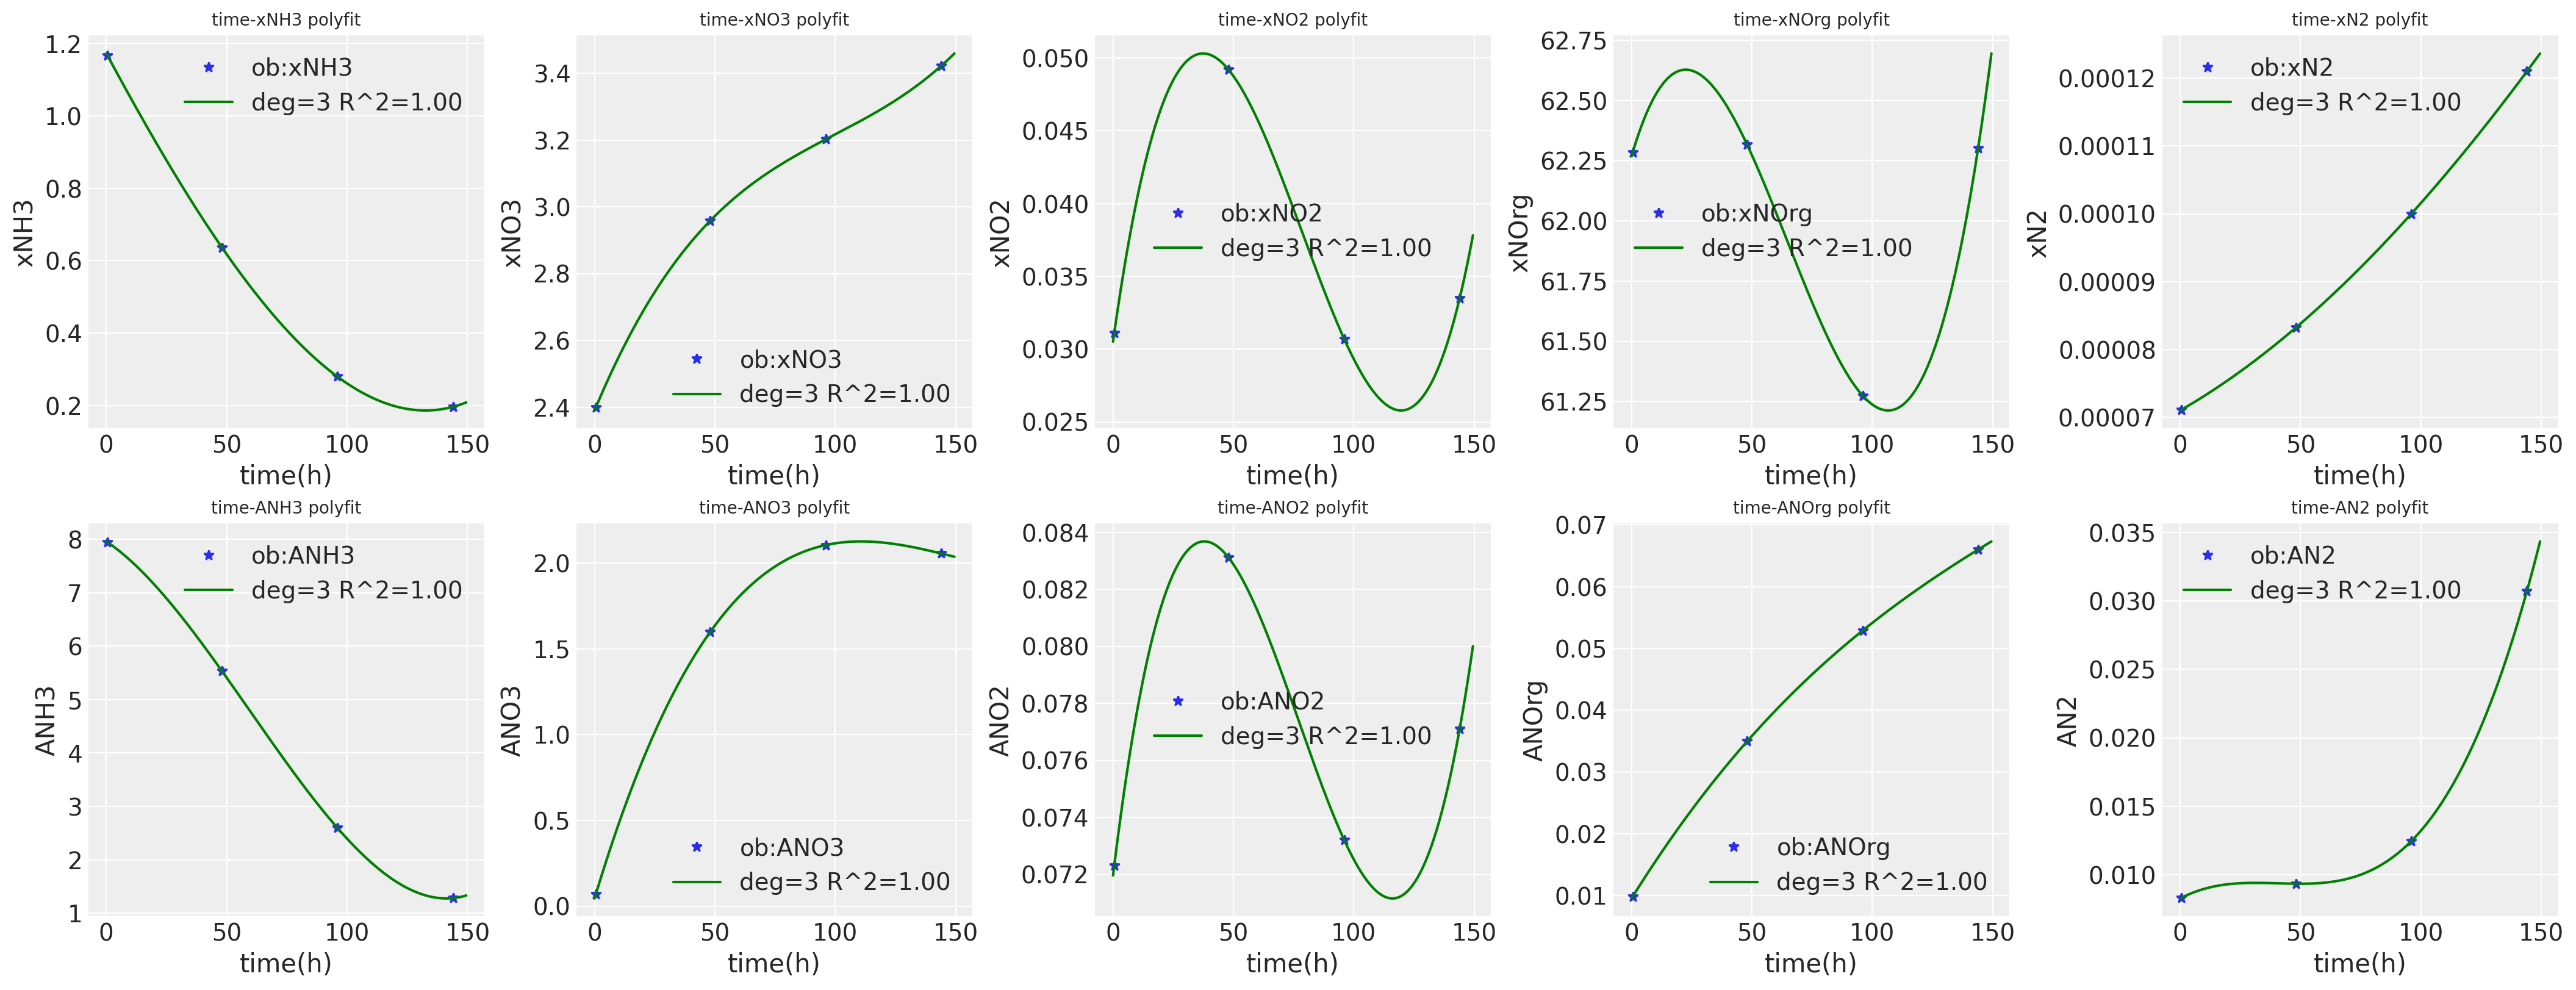

OK


In [22]:
main()